# Predicting Heart Disease using Logistic Regression

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
%matplotlib inline

# Data Preparation

In [11]:
def load_data(data):
    df = pd.read_csv(data)
    return df
url = 'data/framingham.csv'

In [12]:
heart_df = load_data(url)

In [13]:
heart_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [14]:
heart_df.shape

(4240, 16)

In [23]:
# separating the target variable from the predictors
x = heart_df.drop(['TenYearCHD', 'education'], axis=1)
y = heart_df['TenYearCHD']

In [24]:
# Checking for missing values
x.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
dtype: int64

In [25]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4211 non-null   float64
 4   BPMeds           4187 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4190 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4221 non-null   float64
 12  heartRate        4239 non-null   float64
 13  glucose          3852 non-null   float64
dtypes: float64(8), int64(6)
memory usage: 463.9 KB


In [26]:
count = 0
for i in x.isnull().sum(axis=1):
    if i > 0:
        count = count + 1
print('total number of rows with missing values is ', count)
print('since it is only ', round(count/len(x.index)*100), 'percent of the entire dataset the rows with missing values are excluded')

total number of rows with missing values is  489
since it is only  12 percent of the entire dataset the rows with missing values are excluded


# EDA

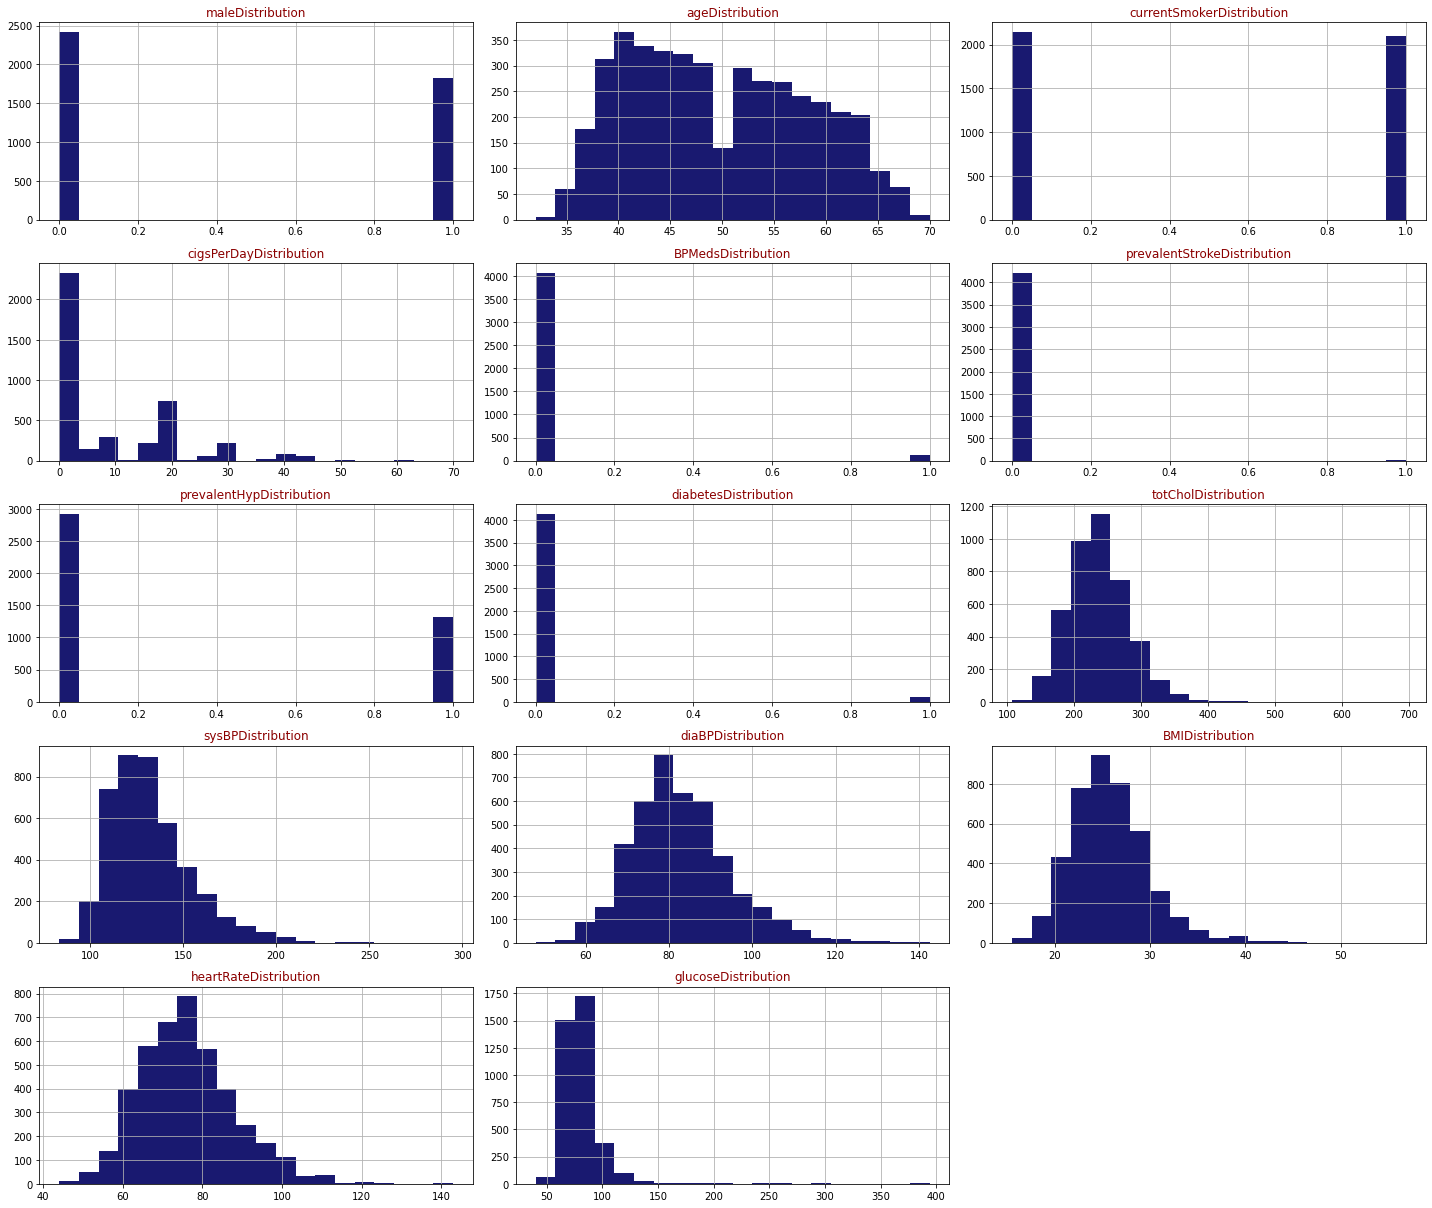

In [29]:
def draw_hist(data, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows, cols, i + 1)
        data[feature].hist(bins=20, ax=ax, facecolor='midnightblue')
        ax.set_title(feature+'Distribution', color='DarkRed')
    fig.tight_layout()
    plt.show()
draw_hist(x, x.columns, 6, 3)

In [33]:
heart_df['TenYearCHD'].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

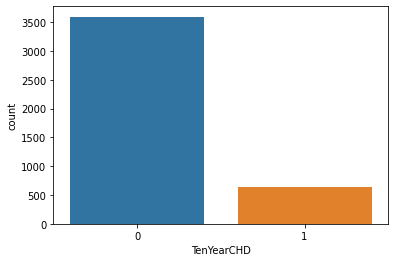

In [34]:
sns.countplot(x = 'TenYearCHD', data = heart_df)

In [42]:
# Split the data into test and trainset 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5, stratify=y)

In [48]:
# in order to prevent overfitting, all data preprocessing is done after spliting of the data
# We create a pipeline to run simple imputation, standard scaler and logistic regression()
create_pipeline = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'), StandardScaler(), 
                                LogisticRegression(class_weight=None, penalty='l2' ))

In [49]:
create_pipeline.fit(x_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [50]:
y_pred = create_pipeline.predict(x_test)

In [51]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [52]:
print("Accuracy score is ", accuracy_score( y_test, y_pred))

Accuracy score is  0.8525943396226415


<AxesSubplot:>

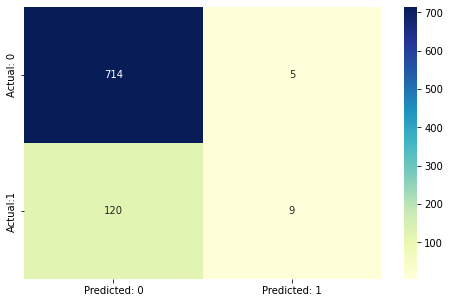

In [53]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, columns=['Predicted: 0', 'Predicted: 1'], index=['Actual: 0', 'Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [55]:
y_pred_prob = create_pipeline.predict_proba(x_test)[:,:]
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of heart disease(0)', 'Prob of heart disease (1)'])
y_pred_prob_df.head()

,Prob of heart disease(0),Prob of heart disease (1)
0,0.450550,0.549450
1,0.791382,0.208618
2,0.772216,0.227784
3,0.961037,0.038963
4,0.708146,0.291854


# Lower the threshold in order to have less false negatives

In [59]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes = create_pipeline.predict_proba(x_test)
    y_pred2 = binarize(y_pred_prob_yes)[:, 1]
    cm2=confusion_matrix(y_test, y_pred2)
    print('with', i/10, 'threshold the confusion Matrix is', '\n', cm2, '\n', 'with', cm2[0,0]+cm2[1,1]
         , 'correct predictions and', cm2[1,0], 'Type II error (False negatives)', '\n\n', 'sensitivity: ',
          cm2[1,1]/(float(cm2[1,1]+cm2[1,0])), 'Specificity: ', cm2[0,0]/(float(cm2[0,0]+cm2[0,1])), '\n\n')

with 0.1 threshold the confusion Matrix is 
 [[  0 719]
 [  0 129]] 
 with 129 correct predictions and 0 Type II error (False negatives) 

 sensitivity:  1.0 Specificity:  0.0 


with 0.2 threshold the confusion Matrix is 
 [[  0 719]
 [  0 129]] 
 with 129 correct predictions and 0 Type II error (False negatives) 

 sensitivity:  1.0 Specificity:  0.0 


with 0.3 threshold the confusion Matrix is 
 [[  0 719]
 [  0 129]] 
 with 129 correct predictions and 0 Type II error (False negatives) 

 sensitivity:  1.0 Specificity:  0.0 


with 0.4 threshold the confusion Matrix is 
 [[  0 719]
 [  0 129]] 
 with 129 correct predictions and 0 Type II error (False negatives) 

 sensitivity:  1.0 Specificity:  0.0 




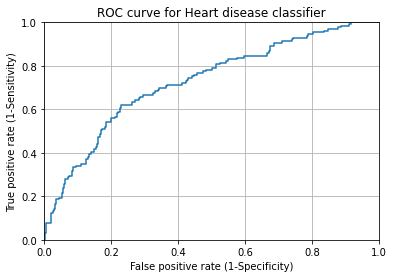

In [60]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:, 1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (1-Sensitivity)')
plt.grid(True)

In [63]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred_prob_yes[:, 1])
auc

0.726364136235728